In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
len(df.target)

150

In [7]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

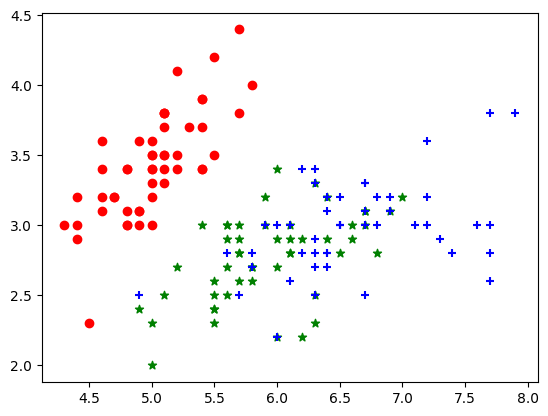

In [8]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'] , marker= 'o' , color ='red')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'] , marker= '*' , color ='green')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'] , marker= '+' , color ='blue')

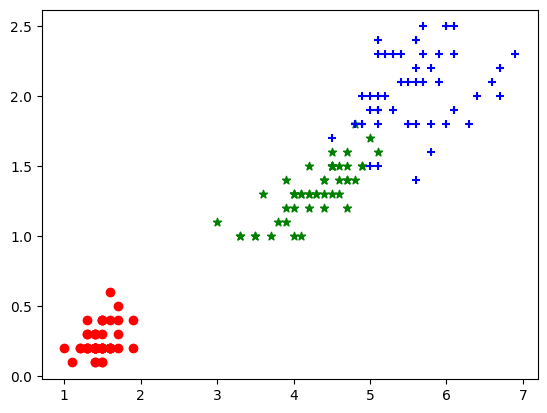

In [9]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'] , marker= 'o' , color ='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'] , marker= '*' , color ='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'] , marker= '+' , color ='blue')

In [10]:
X_train, X_test, y_train, y_test=train_test_split(df[['sepal length (cm)','sepal width (cm)','petal length (cm)',	'petal width (cm)']],df.species,test_size=0.2)

In [11]:
model = SVC(C=10)
model.fit(X_train,y_train)

SVC(C=10)

In [12]:
len(X_train)

120

In [13]:
model.predict(X_test)

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa'], dtype=object)

In [14]:
prediction = model.predict(X_test)
cm = confusion_matrix(y_test,prediction)
cm

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]])

In [15]:
model.score(X_test, y_test)

0.9666666666666667

In [16]:
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, prediction, average='weighted')
recall = recall_score(y_test, prediction, average='weighted')
f1 = f1_score(y_test, prediction, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


Text(95.72222222222221, 0.5, 'Truth')

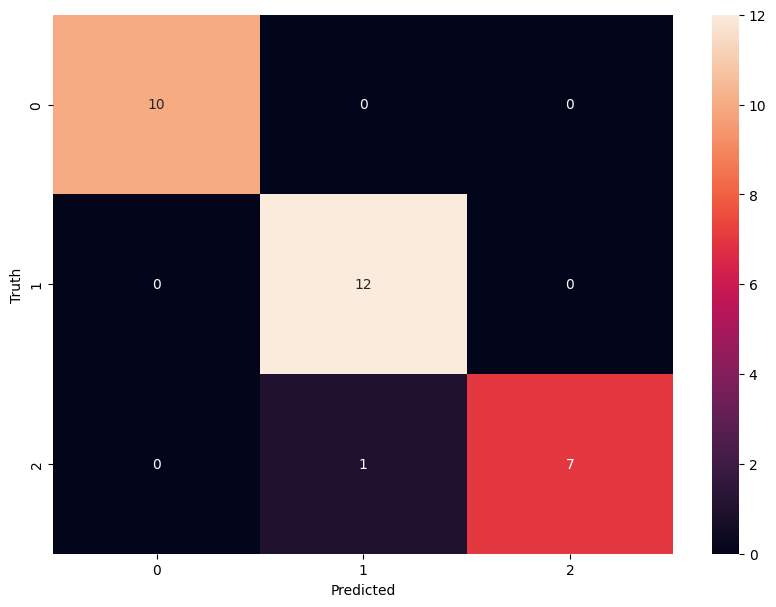

In [17]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:

clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00165582, 0.00119104, 0.01097808, 0.00124817, 0.00813622,
        0.00128503]),
 'std_fit_time': array([0.00041382, 0.00028452, 0.01964053, 0.00032475, 0.01235214,
        0.00025011]),
 'mean_score_time': array([0.001579  , 0.000808  , 0.0009871 , 0.00099277, 0.00370049,
        0.00079913]),
 'std_score_time': array([7.41814854e-04, 8.60213440e-05, 1.65695074e-04, 3.88464632e-04,
        5.10754726e-03, 7.29573942e-05]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'li

In [19]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001656,0.000414,0.001579,0.000742,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.001191,0.000285,0.000808,0.000086,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.010978,0.019641,0.000987,0.000166,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.001248,0.000325,0.000993,0.000388,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.008136,0.012352,0.003700,0.005108,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.001285,0.000250,0.000799,0.000073,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [20]:

df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [21]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [22]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,linear,0.966667
1,10,rbf,0.980000
